# Case Web Motors

### Contexto:
* A Webmotors dispõe de diversos produtos digitais para solucionar problemas durante a compra, utilização e venda de um veículo, sendo um de seus principais e mais conhecidos o classificado. Para o classificado utilizamos o lead model para monetizar nosso produto. Um lead é uma demonstração de interesse de um comprador para um vendedor.

### Definições:
> Lead: Demonstração de interesse de um comprador por um produto de algum vendedor  
>Dados: 0 -> Não; 1 -> Sim

### Tarefa:
* Determine ao menos uma alternativa para potencializar o recebimento de leads dos anúncios.

### Parte1: 
Exploração dos Dados buscando a correlação dos leads com as outras variáveis

### Parte 2:
Desenvolver um modelo para de determinar se um anúncio receberá lead.  
Que outras informações, as quais você não teve acesso, poderiam ajudar a chegar a conclusões melhores?

### Parte 3 (Bônus!!!)
Proponha um modelo para determinar a quantidade de leads que um anúncio irá receber

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option('max_columns', None)

In [2]:
print(os.getcwd())

c:\FCD\Case-GCBInvestimentos


In [3]:
# Dicionária do que significa as colunas no dataset
dicionario = pd.read_csv('Case 1 - dicionario.csv')
dicionario

,attribute,description
0,cod_anuncio,código do anúncio
1,cod_cliente,código do anunciante
2,cod_tipo_pessoa,"tipo de anunciante: PF=1, PJ=2"
3,prioridade,"prioridade do anúncio (1=alta, 2-média, 3-baixa)"
4,leads,tota de propostas recebidas
5,views,quantidade de visualizações no anúncio
6,cliques_telefone,quantidade de cliques no telefone anunciado
7,cod_marca_veiculo,código da marca do veículo
8,cod_modelo_veiculo,código do modelo veículo
9,cod_versao_veiculo,código da versão do veículo


In [4]:
df = pd.read_csv('Case 1 - dados.csv')
df.head()

,cod_anuncio,cod_cliente,cod_tipo_pessoa,prioridade,leads,views,cliques_telefone*,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,ano_modelo,cep_2dig,uf_cidade,vlr_anuncio,qtd_fotos,km_veiculo,vlr_mercado,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica,flg_blindado,flg_aceita_troca,flg_adaptado_pcd,combustivel,cambio,portas,alarme,airbag,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
0,2,7941,2,3,1,0,0,34,769,346932,2018,75,GO_Itumbiara,110990.0,7,0,NaN,0,0,0.0,0.0,0,0.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,1770,1,3,1,0,4,2,704,340148,1996,6,SP_Osasco,8300.0,0,689815,NaN,0,0,0.0,0.0,0,0.0,0,0,0.0,alcool,manual,2.0,S,NaN,S,N,N,S,N,S,S,N,N,N
2,8,709,1,3,4,0,11,30,1071,310713,2002,2,SP_SÃ£o Paulo,38800.0,4,33700,NaN,0,0,0.0,0.0,0,0.0,0,0,0.0,gasolina,manual,4.0,S,NaN,S,N,S,S,S,S,S,S,N,N
3,13,9708,1,2,12,0,14,10,2028,341195,1995,4,SP_SÃ£o Paulo,44000.0,8,105000,NaN,0,1,1.0,0.0,0,0.0,0,0,0.0,gasolina,automatico,2.0,N,S,S,S,S,N,N,S,S,S,N,N
4,15,1363,1,2,8,0,11,12,805,332063,1995,5,SP_SÃ£o Paulo,30000.0,6,71240,NaN,0,0,0.0,0.0,0,0.0,0,0,0.0,gasolina,automatico,4.0,S,N,S,S,S,S,S,S,S,S,N,N


# Limpeza e Tratamento de Dados

In [5]:
# Temos 48665 registros e 41 colunas
df.shape

(48665, 41)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48665 entries, 0 to 48664
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   cod_anuncio                        48665 non-null  int64  
 1   cod_cliente                        48665 non-null  int64  
 2   cod_tipo_pessoa                    48665 non-null  int64  
 3   prioridade                         48665 non-null  int64  
 4   leads                              48665 non-null  int64  
 5   views                              48665 non-null  int64  
 6   cliques_telefone*                  48665 non-null  int64  
 7   cod_marca_veiculo                  48665 non-null  int64  
 8   cod_modelo_veiculo                 48665 non-null  int64  
 9   cod_versao_veiculo                 48665 non-null  int64  
 10  ano_modelo                         48665 non-null  int64  
 11  cep_2dig                           48665 non-null  int

In [7]:
# Criando uma lista com os nomes das colunas do tipo 'object'
obj_list = df.select_dtypes(include = ['object']).columns.to_list()
obj_list

['uf_cidade',
 'combustivel',
 'cambio',
 'alarme',
 'airbag',
 'arquente',
 'bancocouro',
 'arcondic',
 'abs',
 'desembtras',
 'travaeletr',
 'vidroseletr',
 'rodasliga',
 'sensorchuva',
 'sensorestacion']

In [8]:
df.dtypes.value_counts()

int64      19
object     15
float64     7
dtype: int64

### Valores NA

In [9]:
# Verificação de valores missing
df.isna().sum()

cod_anuncio                             0
cod_cliente                             0
cod_tipo_pessoa                         0
prioridade                              0
leads                                   0
views                                   0
cliques_telefone*                       0
cod_marca_veiculo                       0
cod_modelo_veiculo                      0
cod_versao_veiculo                      0
ano_modelo                              0
cep_2dig                                0
uf_cidade                               0
vlr_anuncio                             0
qtd_fotos                               0
km_veiculo                              0
vlr_mercado                          6217
flg_unico_dono                          0
flg_licenciado                          0
flg_ipva_pago                         312
flg_todas_revisoes_concessionaria     312
flg_todas_revisoes_agenda_veiculo       0
flg_garantia_fabrica                  312
flg_blindado                      

In [10]:
# Vamos remover registros que tenham os valores missings
df = df.dropna(axis = 0).reset_index(drop = True)

In [11]:
df.shape

(42157, 41)

In [97]:
df.isna().any().sum()

0

In [13]:
# Ainda temos um data cerca de 87% do nosso dataset original
len(df)/48665

0.8662693927874242

### Valores duplicados

In [14]:
# Verificação de valores duplicados
df.duplicated().sum()

0

* Não há valores duplicados

### Valores Inconsistentes

In [15]:
# Iremos remover registros onde o número de 'views' sejam menor que o número de 'leads', pois esta informação não faz sentido.
# Temos diversos registros onde houve 0 'views' e obtivemos um número, as vezes até relativamente altos, de 'leads'.
index_to_drop = df[(df.views < df.leads)].index

In [16]:
df.drop(df.index[(index_to_drop)], inplace = True)

In [17]:
df.shape

(41322, 41)

In [18]:
df.head(3)

,cod_anuncio,cod_cliente,cod_tipo_pessoa,prioridade,leads,views,cliques_telefone*,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,ano_modelo,cep_2dig,uf_cidade,vlr_anuncio,qtd_fotos,km_veiculo,vlr_mercado,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica,flg_blindado,flg_aceita_troca,flg_adaptado_pcd,combustivel,cambio,portas,alarme,airbag,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
2,95,16462,1,1,0,0,6,12,2722,342061,2010,8,SP_PoÃ¡,31900.0,8,74000,26875.00573,1,1,1.0,1.0,0,1.0,0,1,0.0,gasolina e alcool,automatico sequencial,4.0,S,S,S,S,S,S,S,S,S,S,S,S
3,110,1987,1,1,0,0,2,2,1161,339241,2009,1,SP_SÃ£o Paulo,25500.0,8,128000,23779.45322,0,1,1.0,0.0,0,0.0,0,1,0.0,gasolina e alcool,automatico,4.0,S,S,S,N,S,S,S,S,S,N,N,N
4,117,18367,1,1,0,0,10,3,687,344077,2010,9,SP_SÃ£o Bernardo do Campo,23990.0,6,60000,22428.12461,1,1,1.0,0.0,0,0.0,0,1,0.0,gasolina e alcool,manual,4.0,N,N,S,N,S,N,S,S,S,S,N,N


# Análise Exploratória dos Dados

In [19]:
# Describe das variáveis 'numéricas'
df.describe()

,cod_anuncio,cod_cliente,cod_tipo_pessoa,prioridade,leads,views,cliques_telefone*,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,ano_modelo,cep_2dig,vlr_anuncio,qtd_fotos,km_veiculo,vlr_mercado,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica,flg_blindado,flg_aceita_troca,flg_adaptado_pcd,portas
count,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,4.132200e+04,41322.000000,4.132200e+04,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000
mean,102310.673661,8271.707420,1.882411,2.614781,3.600261,418.666473,6.569963,18.643023,2072.048110,343161.451817,2013.517037,38.873554,8.574010e+04,6.681138,2.126215e+05,52595.959593,0.212574,0.299380,0.400610,0.148105,0.060500,0.069576,0.017013,0.070955,0.000387,3.780214
std,54226.380544,7442.557866,0.322124,0.760240,8.712076,604.503062,8.842611,36.442259,1110.922968,8338.140697,3.473578,33.614237,1.570972e+06,2.137584,1.421112e+07,41158.547585,0.409134,0.457992,0.490028,0.355208,0.238415,0.254433,0.129320,0.256753,0.019674,0.734626
min,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,650.000000,1429.000000,1951.000000,1.000000,4.900000e+03,0.000000,0.000000e+00,6292.843540,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56357.000000,3563.000000,2.000000,3.000000,1.000000,88.000000,2.000000,4.000000,788.000000,342655.000000,2012.000000,9.000000,3.090000e+04,6.000000,3.400000e+04,31366.764470,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,102994.500000,6504.000000,2.000000,3.000000,1.000000,212.000000,4.000000,5.000000,2487.000000,344131.000000,2014.000000,22.000000,3.999000e+04,8.000000,5.926450e+04,40607.151760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,149444.250000,10018.250000,2.000000,3.000000,4.000000,472.000000,8.000000,26.000000,3202.000000,345486.000000,2016.000000,78.000000,6.089000e+04,8.000000,8.953100e+04,61358.535275,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
max,194701.000000,38724.000000,2.000000,3.000000,348.000000,4872.000000,205.000000,304.000000,3676.000000,347728.000000,2019.000000,99.000000,1.220000e+08,20.000000,2.147484e+09,921239.188800,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


As colunas 'cod_marca_veiculo', 'cod_modelo_veiculo' e 'cod_versao_veiculo' são inconclusivas, visto que estão dadas em códigos.  
Seria interessante se tivessemos acesso ao que significam para melhor análise dos dados

> A grande maioria dos anuncios possuem lead baixos, cerca de 75% deles estão com até 3 leads

In [20]:
df[['cod_marca_veiculo','cod_modelo_veiculo','cod_marca_veiculo']].nunique()

cod_marca_veiculo      44
cod_modelo_veiculo    428
cod_marca_veiculo      44
dtype: int64

In [21]:
# Quase da metade dos anúncios possuem apenas 1 lead
df.leads.value_counts().head(8)

1     20638
0      9286
4      5439
8      2276
12     1198
16      725
20      449
24      319
Name: leads, dtype: int64

In [22]:
# Vamos considerar outliers, registros com valores de zscore maior que três

qtd_leads = []
zscore = stats.zscore(df.leads)
for i in zscore:
    if i > 3:
        qtd_leads.append(i)
print(len(qtd_leads))

# Temos 766 registros considaderados como outliers na coluna leads que poderão ser tratados posteriormente

766


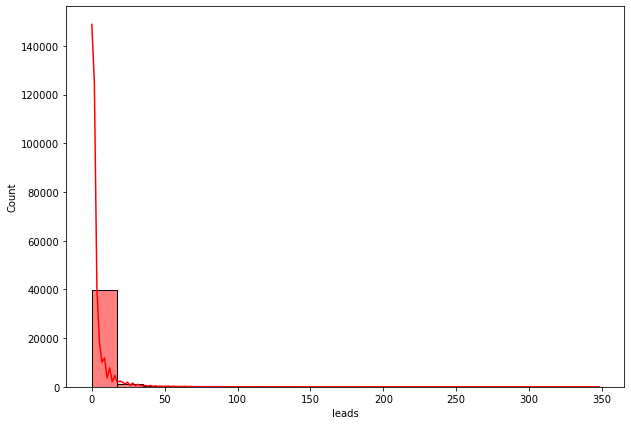

In [23]:
# Visualização da distribuição dos leads
plt.figure(figsize = (10,7))

sns.histplot(data = df, x = df.leads, bins = 20, color = 'r', kde = True)

A grande maioria dos anuncios possuem lead baixos, cerca de 75% deles estão com até 3 leads

In [24]:
# Describe das variáveis 'categóricas'
df[obj_list].describe()

,uf_cidade,combustivel,cambio,alarme,airbag,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
count,41322,41322,41322,41322,41322,41322,41322,41322,41322,41322,41322,41322,41322,41322,41322
unique,844,10,7,2,2,2,2,2,2,2,2,2,2,2,2
top,SP_SÃ£o Paulo,gasolina e alcool,manual,S,S,S,N,S,S,S,S,S,S,N,N
freq,7136,31650,23415,25751,28219,26243,28115,35562,26406,26278,35476,35188,22739,38106,29904


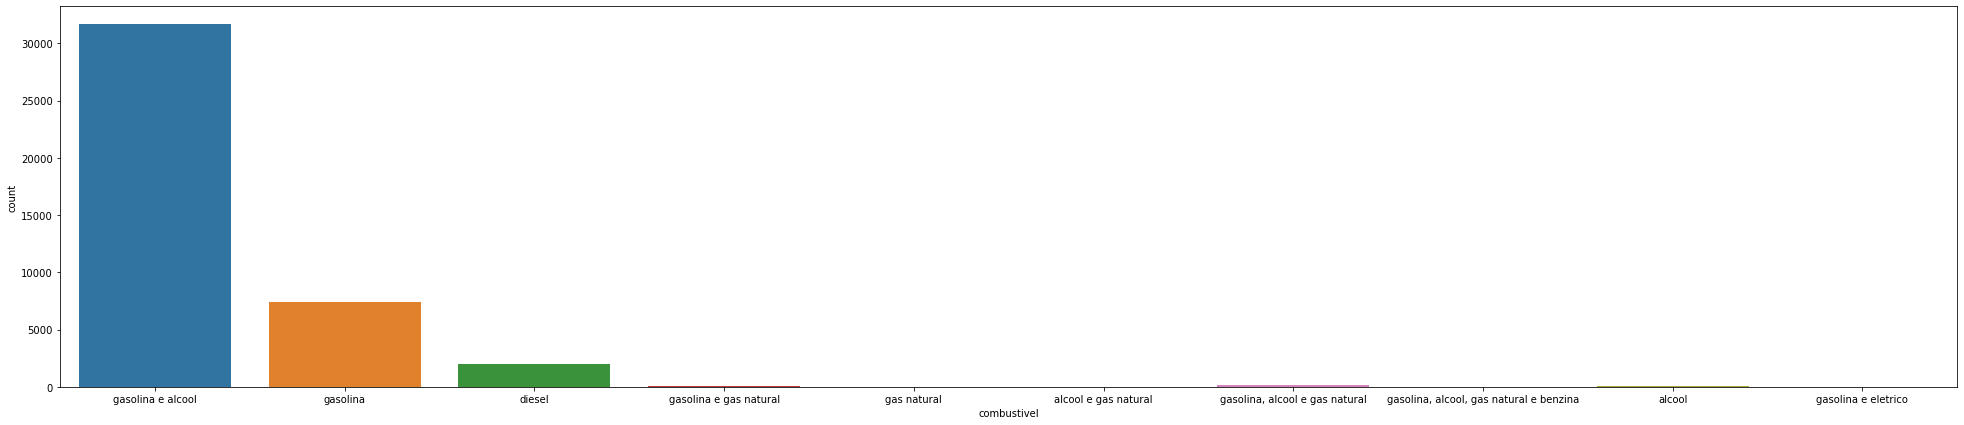

In [25]:
plt.figure(figsize = (34,7))

sns.countplot(x = df.combustivel)

A maior parte dos carros são flex, seguidos por abastecimento a gasolina e diesel

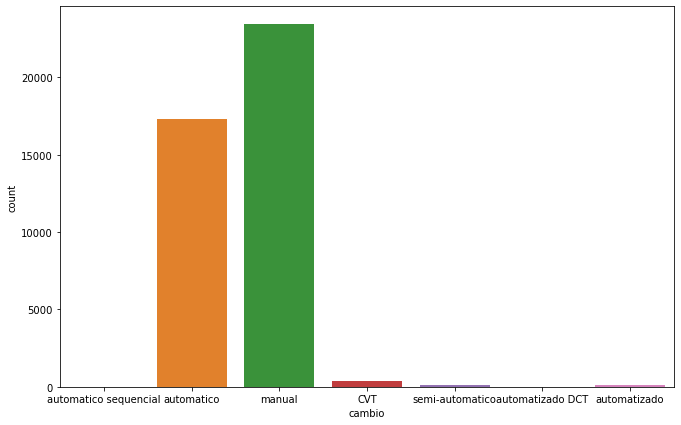

In [26]:
plt.figure(figsize = (11,7))

sns.countplot(x = df.cambio)

As duas categorias de cambio que mais aparecerem são primeiramente o Manual e logo em seguida o automático

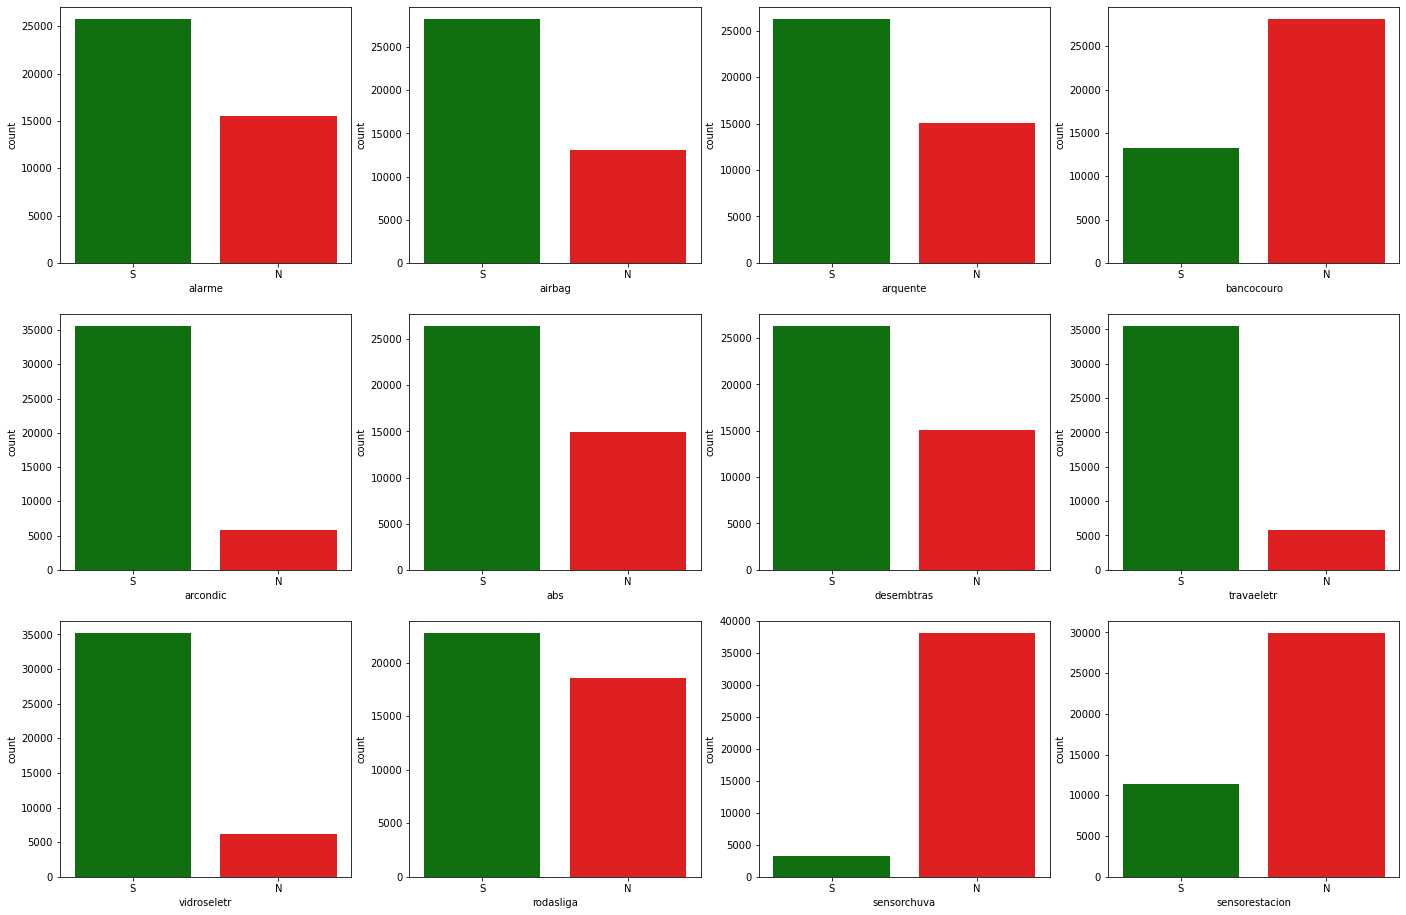

In [27]:
# Visualização dos restante das variáveis 'categóricas'
plt.figure(figsize = (24,16))

for i in range(3, len(obj_list)):
    plt.subplot(3,4, i+1-3)

    sns.countplot(data = df, x = df[obj_list[i]], palette=  ['green','red'])

In [28]:
# Criando um copia do df original para usarmos na exploração de dados
df_eda = df.copy()

# Quais Variáveis mais afetam os leads

In [29]:
df[['cod_marca_veiculo','cod_modelo_veiculo','cod_marca_veiculo']].nunique()

cod_marca_veiculo      44
cod_modelo_veiculo    428
cod_marca_veiculo      44
dtype: int64

In [30]:
df.head()

,cod_anuncio,cod_cliente,cod_tipo_pessoa,prioridade,leads,views,cliques_telefone*,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,ano_modelo,cep_2dig,uf_cidade,vlr_anuncio,qtd_fotos,km_veiculo,vlr_mercado,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica,flg_blindado,flg_aceita_troca,flg_adaptado_pcd,combustivel,cambio,portas,alarme,airbag,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
2,95,16462,1,1,0,0,6,12,2722,342061,2010,8,SP_PoÃ¡,31900.0,8,74000,26875.00573,1,1,1.0,1.0,0,1.0,0,1,0.0,gasolina e alcool,automatico sequencial,4.0,S,S,S,S,S,S,S,S,S,S,S,S
3,110,1987,1,1,0,0,2,2,1161,339241,2009,1,SP_SÃ£o Paulo,25500.0,8,128000,23779.45322,0,1,1.0,0.0,0,0.0,0,1,0.0,gasolina e alcool,automatico,4.0,S,S,S,N,S,S,S,S,S,N,N,N
4,117,18367,1,1,0,0,10,3,687,344077,2010,9,SP_SÃ£o Bernardo do Campo,23990.0,6,60000,22428.12461,1,1,1.0,0.0,0,0.0,0,1,0.0,gasolina e alcool,manual,4.0,N,N,S,N,S,N,S,S,S,S,N,N
9,200,16006,1,1,0,0,13,2,2950,342268,2012,12,SP_SÃ£o JosÃ© dos Campos,44000.0,5,140000,45785.57787,1,1,1.0,1.0,1,1.0,0,0,0.0,gasolina,automatico,4.0,S,S,S,S,S,S,S,S,S,S,N,N
21,303,80,1,3,0,0,8,3,1146,339886,2008,9,SP_SÃ£o Bernardo do Campo,18800.0,7,155000,20273.00157,0,1,1.0,0.0,0,0.0,0,0,0.0,gasolina e alcool,manual,4.0,S,N,S,N,S,N,S,S,S,N,N,N


In [31]:
df.reset_index(drop = True, inplace = True)

### Correlação das variáveis

In [32]:
df.columns

Index(['cod_anuncio', 'cod_cliente', 'cod_tipo_pessoa', 'prioridade', 'leads',
       'views', 'cliques_telefone*', 'cod_marca_veiculo', 'cod_modelo_veiculo',
       'cod_versao_veiculo', 'ano_modelo', 'cep_2dig', 'uf_cidade',
       'vlr_anuncio', 'qtd_fotos', 'km_veiculo', 'vlr_mercado',
       'flg_unico_dono', 'flg_licenciado', 'flg_ipva_pago',
       'flg_todas_revisoes_concessionaria',
       'flg_todas_revisoes_agenda_veiculo', 'flg_garantia_fabrica',
       'flg_blindado', 'flg_aceita_troca', 'flg_adaptado_pcd', 'combustivel',
       'cambio', 'portas', 'alarme', 'airbag', 'arquente', 'bancocouro',
       'arcondic', 'abs', 'desembtras', 'travaeletr', 'vidroseletr',
       'rodasliga', 'sensorchuva', 'sensorestacion'],
      dtype='object')

In [33]:
# Correlação com as variáveis numéricas

correlacao = df_eda[['leads','views','cod_tipo_pessoa','prioridade','cliques_telefone*','ano_modelo','vlr_anuncio','qtd_fotos',
                    'km_veiculo','vlr_mercado','portas']].corr()
correlacao

,leads,views,cod_tipo_pessoa,prioridade,cliques_telefone*,ano_modelo,vlr_anuncio,qtd_fotos,km_veiculo,vlr_mercado,portas
leads,1.000000,-0.069509,-0.279965,-0.148085,0.745222,-0.044091,0.003098,0.062792,-0.003313,0.050612,-0.047593
views,-0.069509,1.000000,0.077334,-0.011008,-0.091932,0.040925,-0.004653,-0.012033,-0.004874,-0.012559,0.002066
cod_tipo_pessoa,-0.279965,0.077334,1.000000,0.272870,-0.381586,0.020834,-0.052691,-0.027462,0.002889,-0.048911,0.107694
prioridade,-0.148085,-0.011008,0.272870,1.000000,-0.182282,-0.163673,-0.018286,-0.074023,0.005425,-0.097717,0.006996
cliques_telefone*,0.745222,-0.091932,-0.381586,-0.182282,1.000000,-0.026187,0.007829,0.077734,-0.003509,0.085334,-0.069482
ano_modelo,-0.044091,0.040925,0.020834,-0.163673,-0.026187,1.000000,0.015284,0.022511,-0.001961,0.347189,0.028098
vlr_anuncio,0.003098,-0.004653,-0.052691,-0.018286,0.007829,0.015284,1.000000,-0.007321,-0.000321,0.038173,-0.007210
qtd_fotos,0.062792,-0.012033,-0.027462,-0.074023,0.077734,0.022511,-0.007321,1.000000,0.004904,0.066055,0.026987
km_veiculo,-0.003313,-0.004874,0.002889,0.005425,-0.003509,-0.001961,-0.000321,0.004904,1.000000,-0.005507,0.002948
vlr_mercado,0.050612,-0.012559,-0.048911,-0.097717,0.085334,0.347189,0.038173,0.066055,-0.005507,1.000000,-0.031548


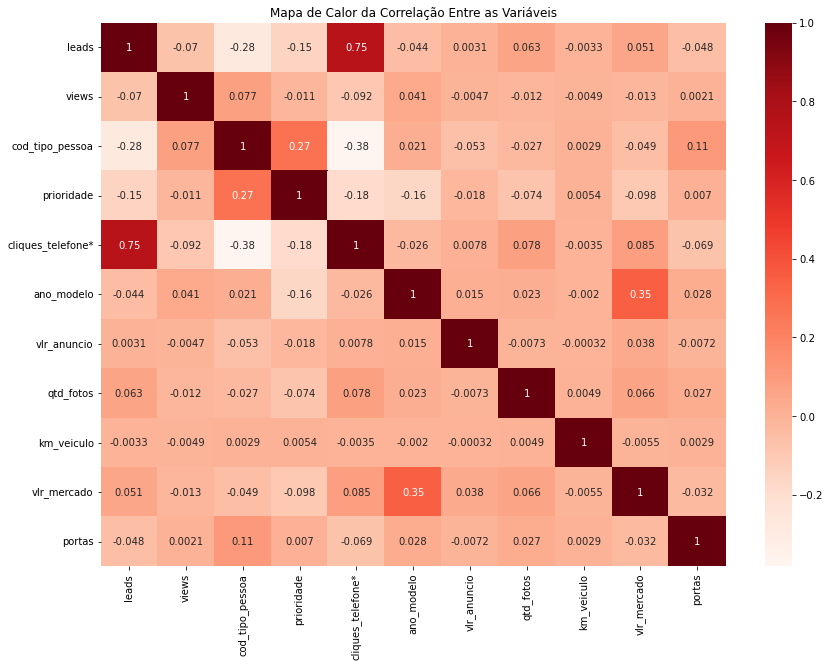

In [34]:
plt.figure(figsize = (14,10))


sns.heatmap(correlacao, annot = True, cmap = 'Reds')
plt.title('Mapa de Calor da Correlação Entre as Variáveis')
plt.show()

A variável mais relevante para o número de leads foi a 'cliques_telefone*'.  
Seguida por uma relação negativa de tipo de pessoas (ou seja, pessoas anpuncios de pessoas físicas tem mais relação, tendo em vista que é o numero 1(1 = PF, 2 = PJ) e prioridade.

## Relação Leads x cliques_telefone

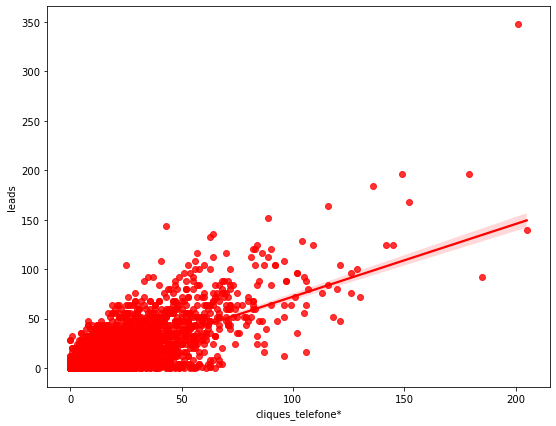

In [35]:
plt.figure(figsize=(9,7))

sns.regplot(data = df, x = 'cliques_telefone*', y = 'leads', color = 'r');

Podemos notar uma relação positiva do numero de cliques no telefone com o numero de 'leads'.  

## Relação Leads x Views

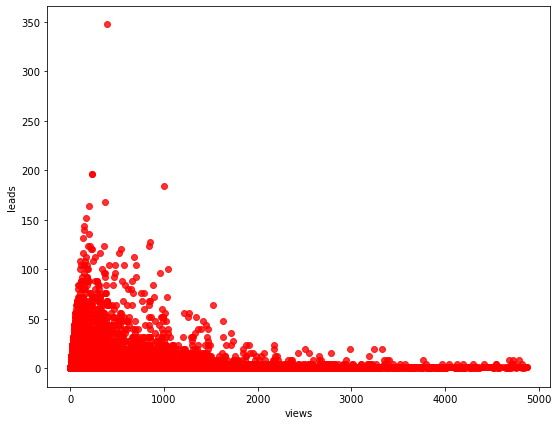

In [36]:
plt.figure(figsize=(9,7))

sns.regplot(data = df, x = 'views', y = 'leads', color = 'r');

Como visto no mapa de correlações, nãao há uma forte correlação entre as variaveis 'leads' e 'views'.  
No entanto, acredito que a variável 'view' devesse apresentar certa correlação com os 'leads.  
Iremos tentar retirar valores outliers dessas variáveis para verificar se teremos um resultado diferente.

In [37]:
df[['leads', 'views']].describe()

,leads,views
count,41322.000000,41322.000000
mean,3.600261,418.666473
std,8.712076,604.503062
min,0.000000,0.000000
25%,1.000000,88.000000
50%,1.000000,212.000000
75%,4.000000,472.000000
max,348.000000,4872.000000


In [38]:
# Temos 1095 registros considaderados como outliers na coluna views que poderão ser tratados posteriormente
# Temos 766 registros considaderados como outliers na coluna views que poderão ser tratados posteriormente

In [39]:
# Criando um dataframe para alterar e analisar os dados
df_eda = df.copy()

In [40]:
# Retirando os outliers da coluna view
df_eda = df_eda[(np.abs(stats.zscore(df_eda.views)) < 3)]

In [41]:
# Retirando os outliers da coluna leads
df_eda = df_eda[(np.abs(stats.zscore(df_eda.leads)) < 3)]

In [42]:
# Ainda resta 39461 registros
len(df_eda)

39461

In [43]:
# Mesmo após a retirada dos outliers, as variáveis não pareceram ter uma forte correlação entre elas.
df_eda[['leads','views']].corr()

,leads,views
leads,1.000000,-0.079524
views,-0.079524,1.000000


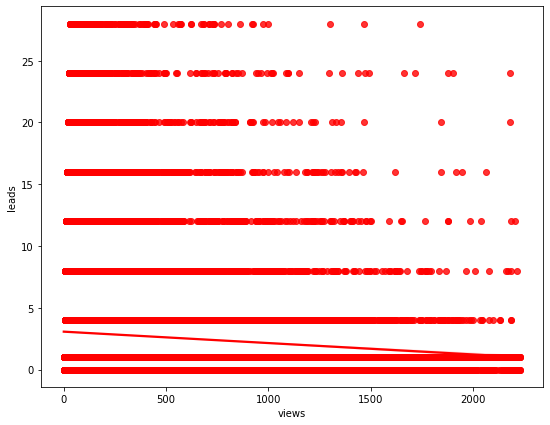

In [44]:
# plot das colunas 'leads' e 'views' após tratamento de outliers
plt.figure(figsize=(9,7))

sns.regplot(data = df_eda, x = 'views', y = 'leads', color = 'r');

Gráfico não demonstra nenhuma relação entre as variáveis

In [47]:
df.head(3)

,cod_anuncio,cod_cliente,cod_tipo_pessoa,prioridade,leads,views,cliques_telefone*,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,ano_modelo,cep_2dig,uf_cidade,vlr_anuncio,qtd_fotos,km_veiculo,vlr_mercado,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica,flg_blindado,flg_aceita_troca,flg_adaptado_pcd,combustivel,cambio,portas,alarme,airbag,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
0,95,16462,1,1,0,0,6,12,2722,342061,2010,8,SP_PoÃ¡,31900.0,8,74000,26875.00573,1,1,1.0,1.0,0,1.0,0,1,0.0,gasolina e alcool,automatico sequencial,4.0,S,S,S,S,S,S,S,S,S,S,S,S
1,110,1987,1,1,0,0,2,2,1161,339241,2009,1,SP_SÃ£o Paulo,25500.0,8,128000,23779.45322,0,1,1.0,0.0,0,0.0,0,1,0.0,gasolina e alcool,automatico,4.0,S,S,S,N,S,S,S,S,S,N,N,N
2,117,18367,1,1,0,0,10,3,687,344077,2010,9,SP_SÃ£o Bernardo do Campo,23990.0,6,60000,22428.12461,1,1,1.0,0.0,0,0.0,0,1,0.0,gasolina e alcool,manual,4.0,N,N,S,N,S,N,S,S,S,S,N,N


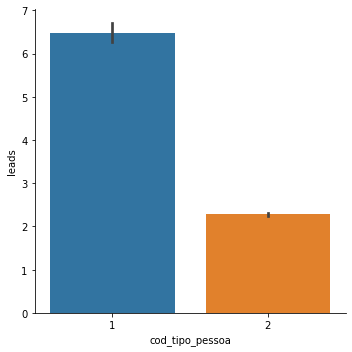

In [55]:
# 1 -> Pessoa Física; 2 -> Pessoa Jurídica
sns.catplot(data = df_eda, x="cod_tipo_pessoa", y="leads", kind = 'bar')

In [80]:
# Transformando a colunas categóricas com S e N em númericas, para também achar alguma correlação com a variável 'leads'
cat_corr = df_eda[obj_list[4:]]
cat_corr

,airbag,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
0,S,S,S,S,S,S,S,S,S,S,S
1,S,S,N,S,S,S,S,S,N,N,N
2,N,S,N,S,N,S,S,S,S,N,N
3,S,S,S,S,S,S,S,S,S,N,N
4,N,S,N,S,N,S,S,S,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...
41298,S,S,N,S,S,S,S,S,S,S,S
41299,N,S,N,S,S,S,S,S,S,N,N
41300,S,S,S,S,S,S,S,S,S,S,N
41301,N,S,N,S,N,N,S,S,S,N,N


In [81]:
for i in range(0, len(cat_corr.columns)):
    
    cat_corr[(cat_corr.columns[i])] = np.where(cat_corr[cat_corr.columns[i]] == 'S', 1, 0)

c:\Users\rafae\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [83]:
cat_corr.head(5)

,airbag,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
0,1,1,1,1,1,1,1,1,1,1,1
1,1,1,0,1,1,1,1,1,0,0,0
2,0,1,0,1,0,1,1,1,1,0,0
3,1,1,1,1,1,1,1,1,1,0,0
4,0,1,0,1,0,1,1,1,0,0,0


In [86]:
# Agora vamos concatenar a variável 'leads'
cat_corr = pd.concat([df_eda.leads, cat_corr], axis = 1)

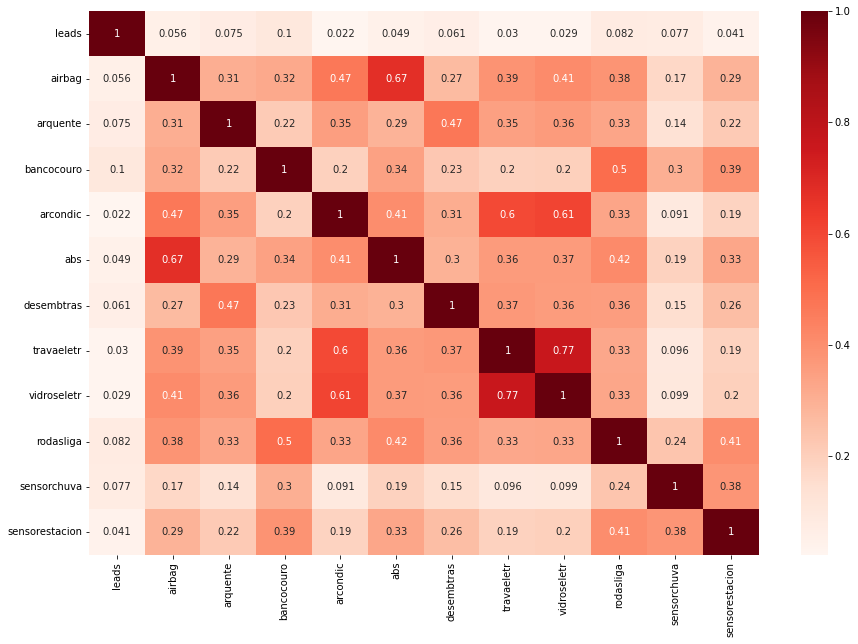

In [90]:
# Mapa de Correlação dessas variáveis
plt.figure(figsize = (15,10))

sns.heatmap(cat_corr.corr(), annot = True, cmap = 'Reds')

Mais uma vez nenhuma variável aparenta ter uma forte correlação com a variável 'leads'